In [1]:
import ROOT 
ROOT.gInterpreter.AddIncludePath(("/home/pagroup/shahina/codes/dragon_analyzer/src"))
ROOT.gSystem.Load("/home/pagroup/shahina/codes/dragon_analyzer/lib/libDragon.so")

Error in <TApplication::ExecuteFile>: macro /NPLib/scripts/NPToolLogon.C not found in path .:/opt/new/share/root/macros


0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from ROOT import TCanvas, TCut, TH1F, TFile, TChain

In [4]:
# Create a canvas
c1 = TCanvas("c1", "c1", 800, 800)

In [5]:
# Define the range of runs and initialize variables
firstRun = 9089
lastRun = 9157
runs = []

In [6]:
# Fill the runs vector, skipping specified ranges
for i in range(firstRun, lastRun + 1):
    if (9115 < i < 9130) or (9137 < i < 9145):
        continue
    runs.append(i)

In [7]:
# Create a TChain and add the files
format_str = "/data/pagroup/pa02/S1805/local_root_attempt/run{}.root"
t5 = TChain("t5")

for run in runs:
    t5.Add(format_str.format(run))

In [8]:
# Set aliases
t5.SetAlias("h", "head")
t5.SetAlias("t", "tail")


True

In [9]:
# Define cuts
pulse = "!(t.io32.trigger_latch & 128) && !(xtofh==-1)"
septof = "xtofh > 2800 && xtofh < 3000"
mcptof = "t.tof.mcp > 124 && t.tof.mcp < 133"
bgo0 = "h.bgo.esort[0] > 1.25 && h.bgo.esort[0] < 12.0"
dsssdhit = "t.dsssd.efront > 0.0 && t.dsssd.efront < 4000.0"
dsssdcut = "t.dsssd.efront > 0.0 && t.dsssd.efront < 4000"


Error in <TChain::LoadTree>: Cannot find tree with name t5 in file /data/pagroup/pa02/S1805/local_root_attempt/run9098.root
Error in <TChain::LoadTree>: Cannot find tree with name t5 in file /data/pagroup/pa02/S1805/local_root_attempt/run9100.root
Error in <TChain::LoadTree>: Cannot find tree with name t5 in file /data/pagroup/pa02/S1805/local_root_attempt/run9130.root
Error in <TChain::LoadTree>: Cannot find tree with name t5 in file /data/pagroup/pa02/S1805/local_root_attempt/run9156.root


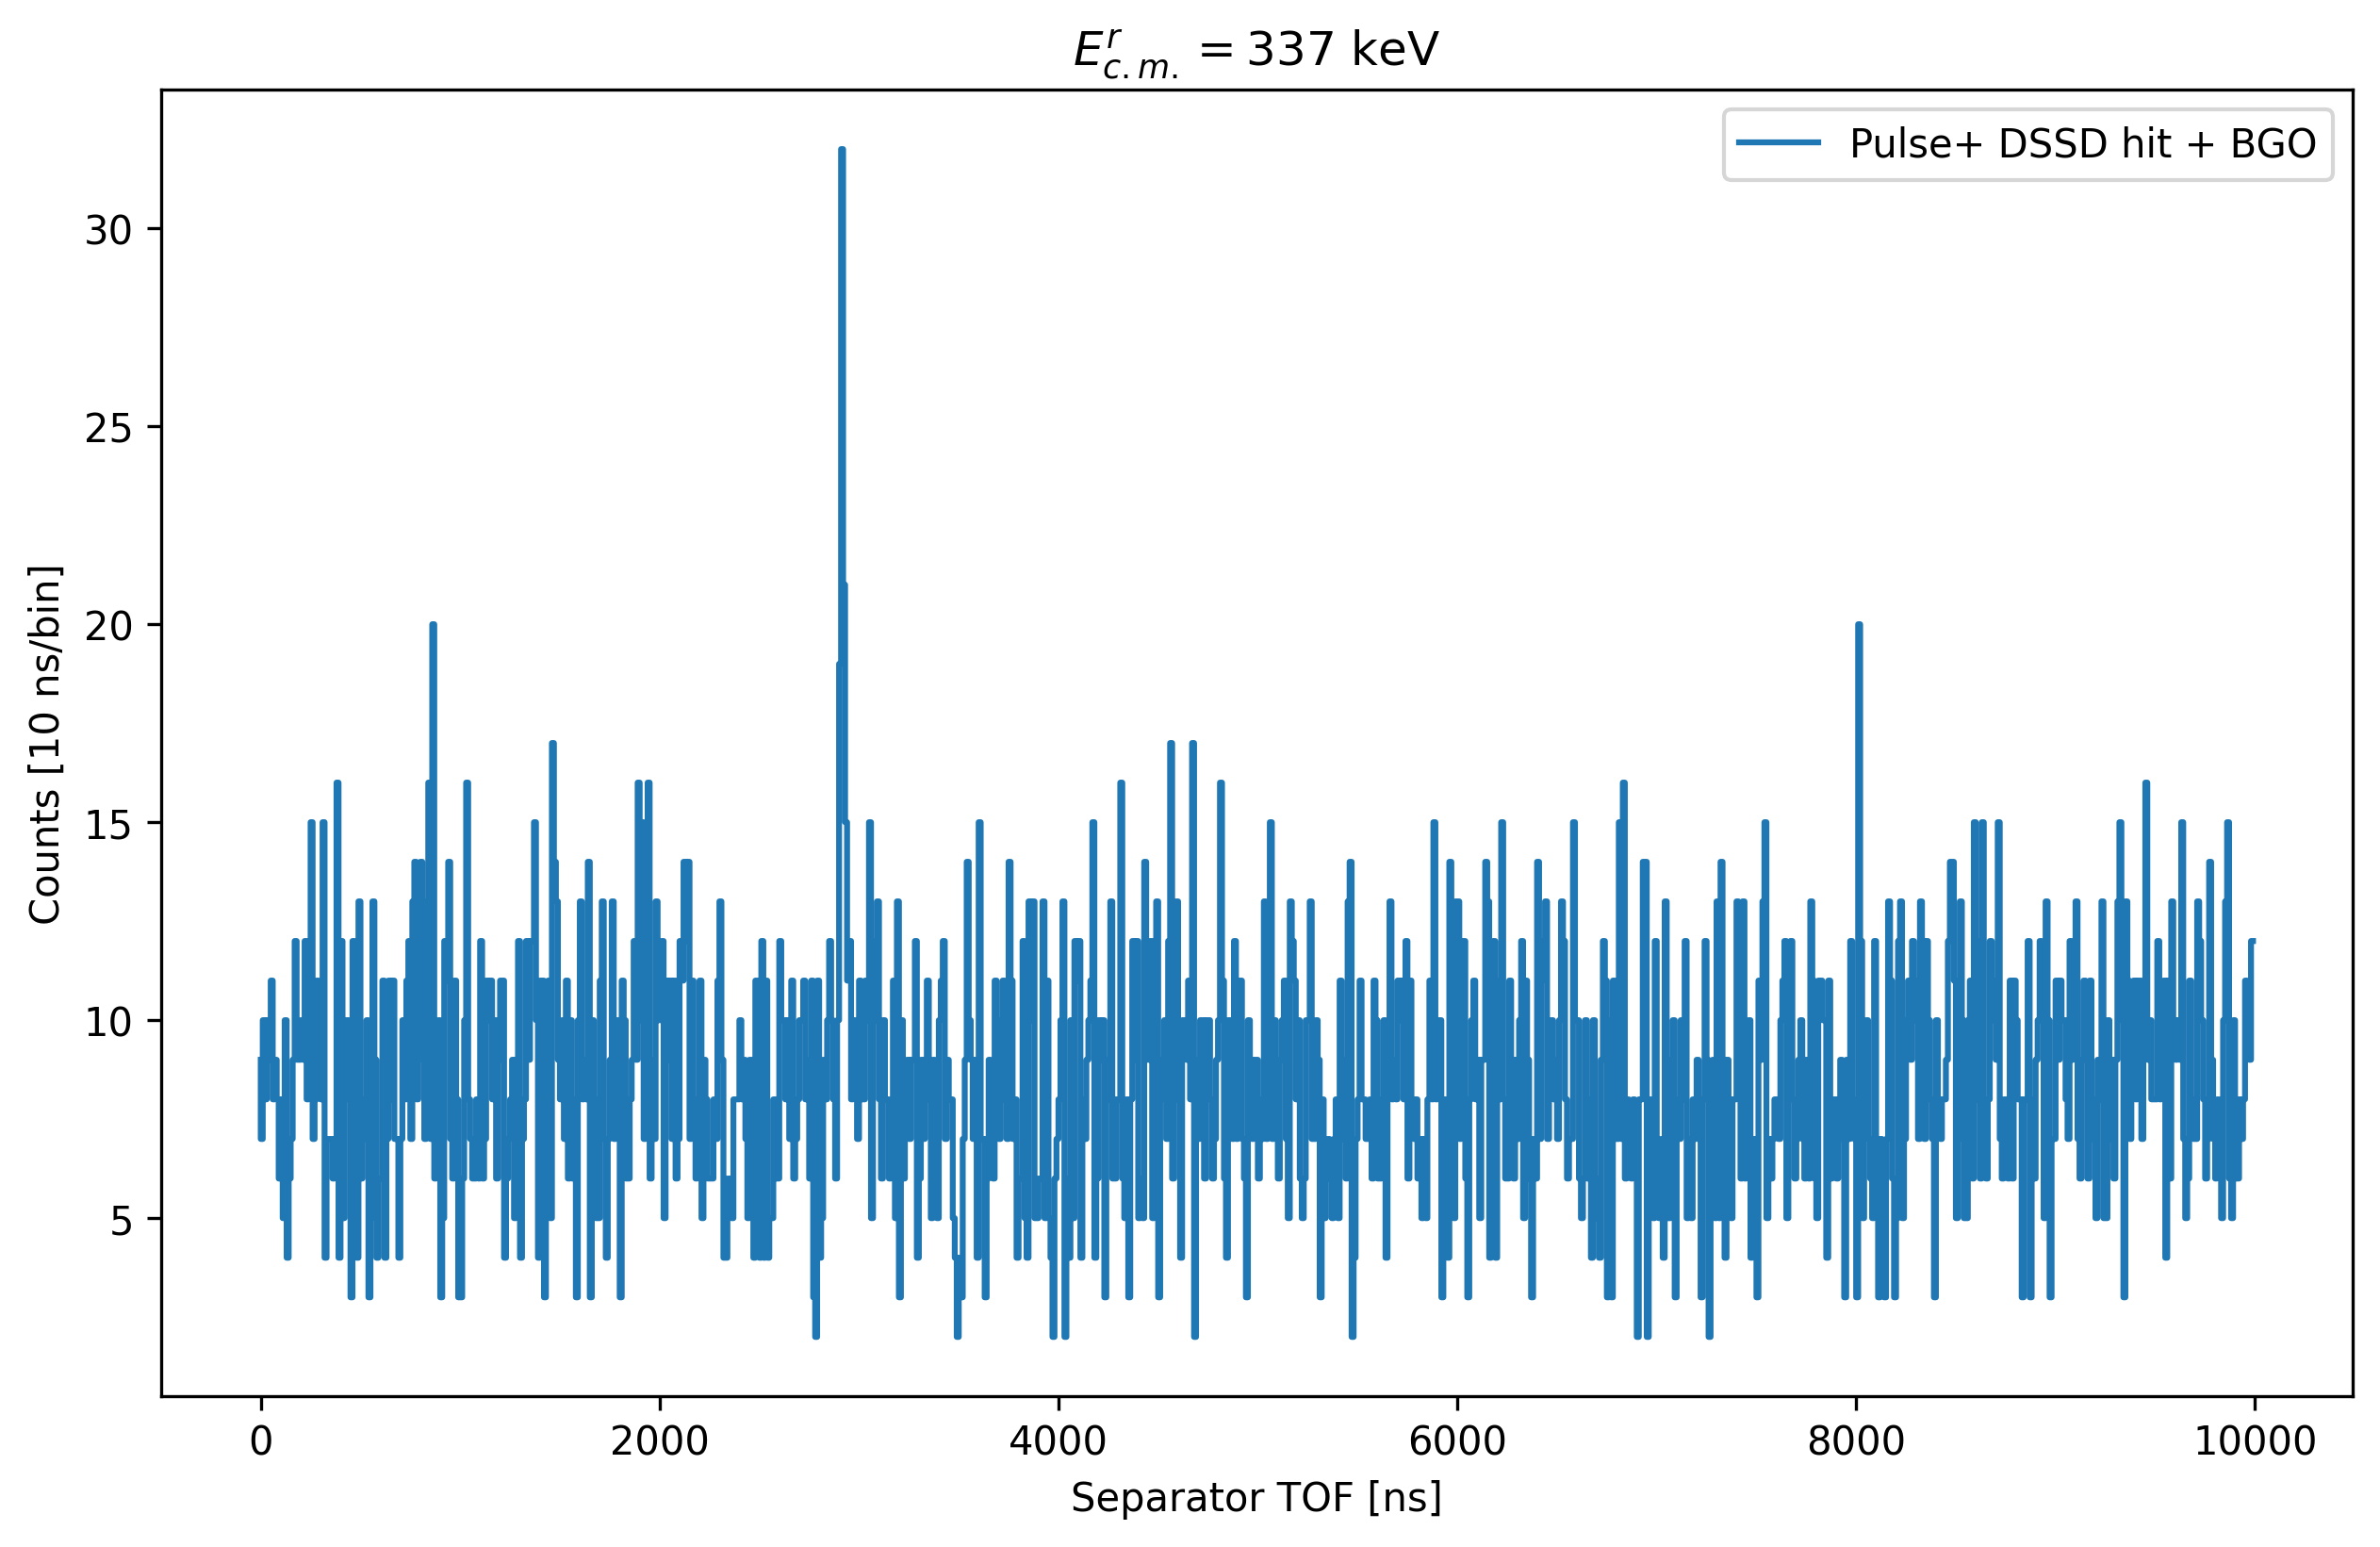

In [10]:

# Create histograms
h_septof = TH1F("h_septof", "E^{r}_{c.m.} = 337 keV", 1000, 0, 10000)
t5.Draw("xtofh >> h_septof", pulse + " && " + dsssdhit + " && " + bgo0)
# Get the histogram from ROOT
h_septof = ROOT.gDirectory.Get("h_septof")


# Convert the histogram to NumPy arrays
n_bins = h_septof.GetNbinsX()
x_edges = np.array([h_septof.GetBinLowEdge(i) for i in range(1, n_bins + 2)])
y_values = np.array([h_septof.GetBinContent(i) for i in range(1, n_bins + 1)])

# Create the step plot using Matplotlib
plt.figure(figsize=(10, 6),dpi=300)

plt.step(x_edges[:-1], y_values,label="Pulse+ DSSD hit + BGO")

# Add labels and title
plt.xlabel('Separator TOF [ns]')
plt.ylabel('Counts [10 ns/bin]')
plt.title(r'$E^{r}_{c.m.} = 337 \text{ keV}$')
plt.legend()




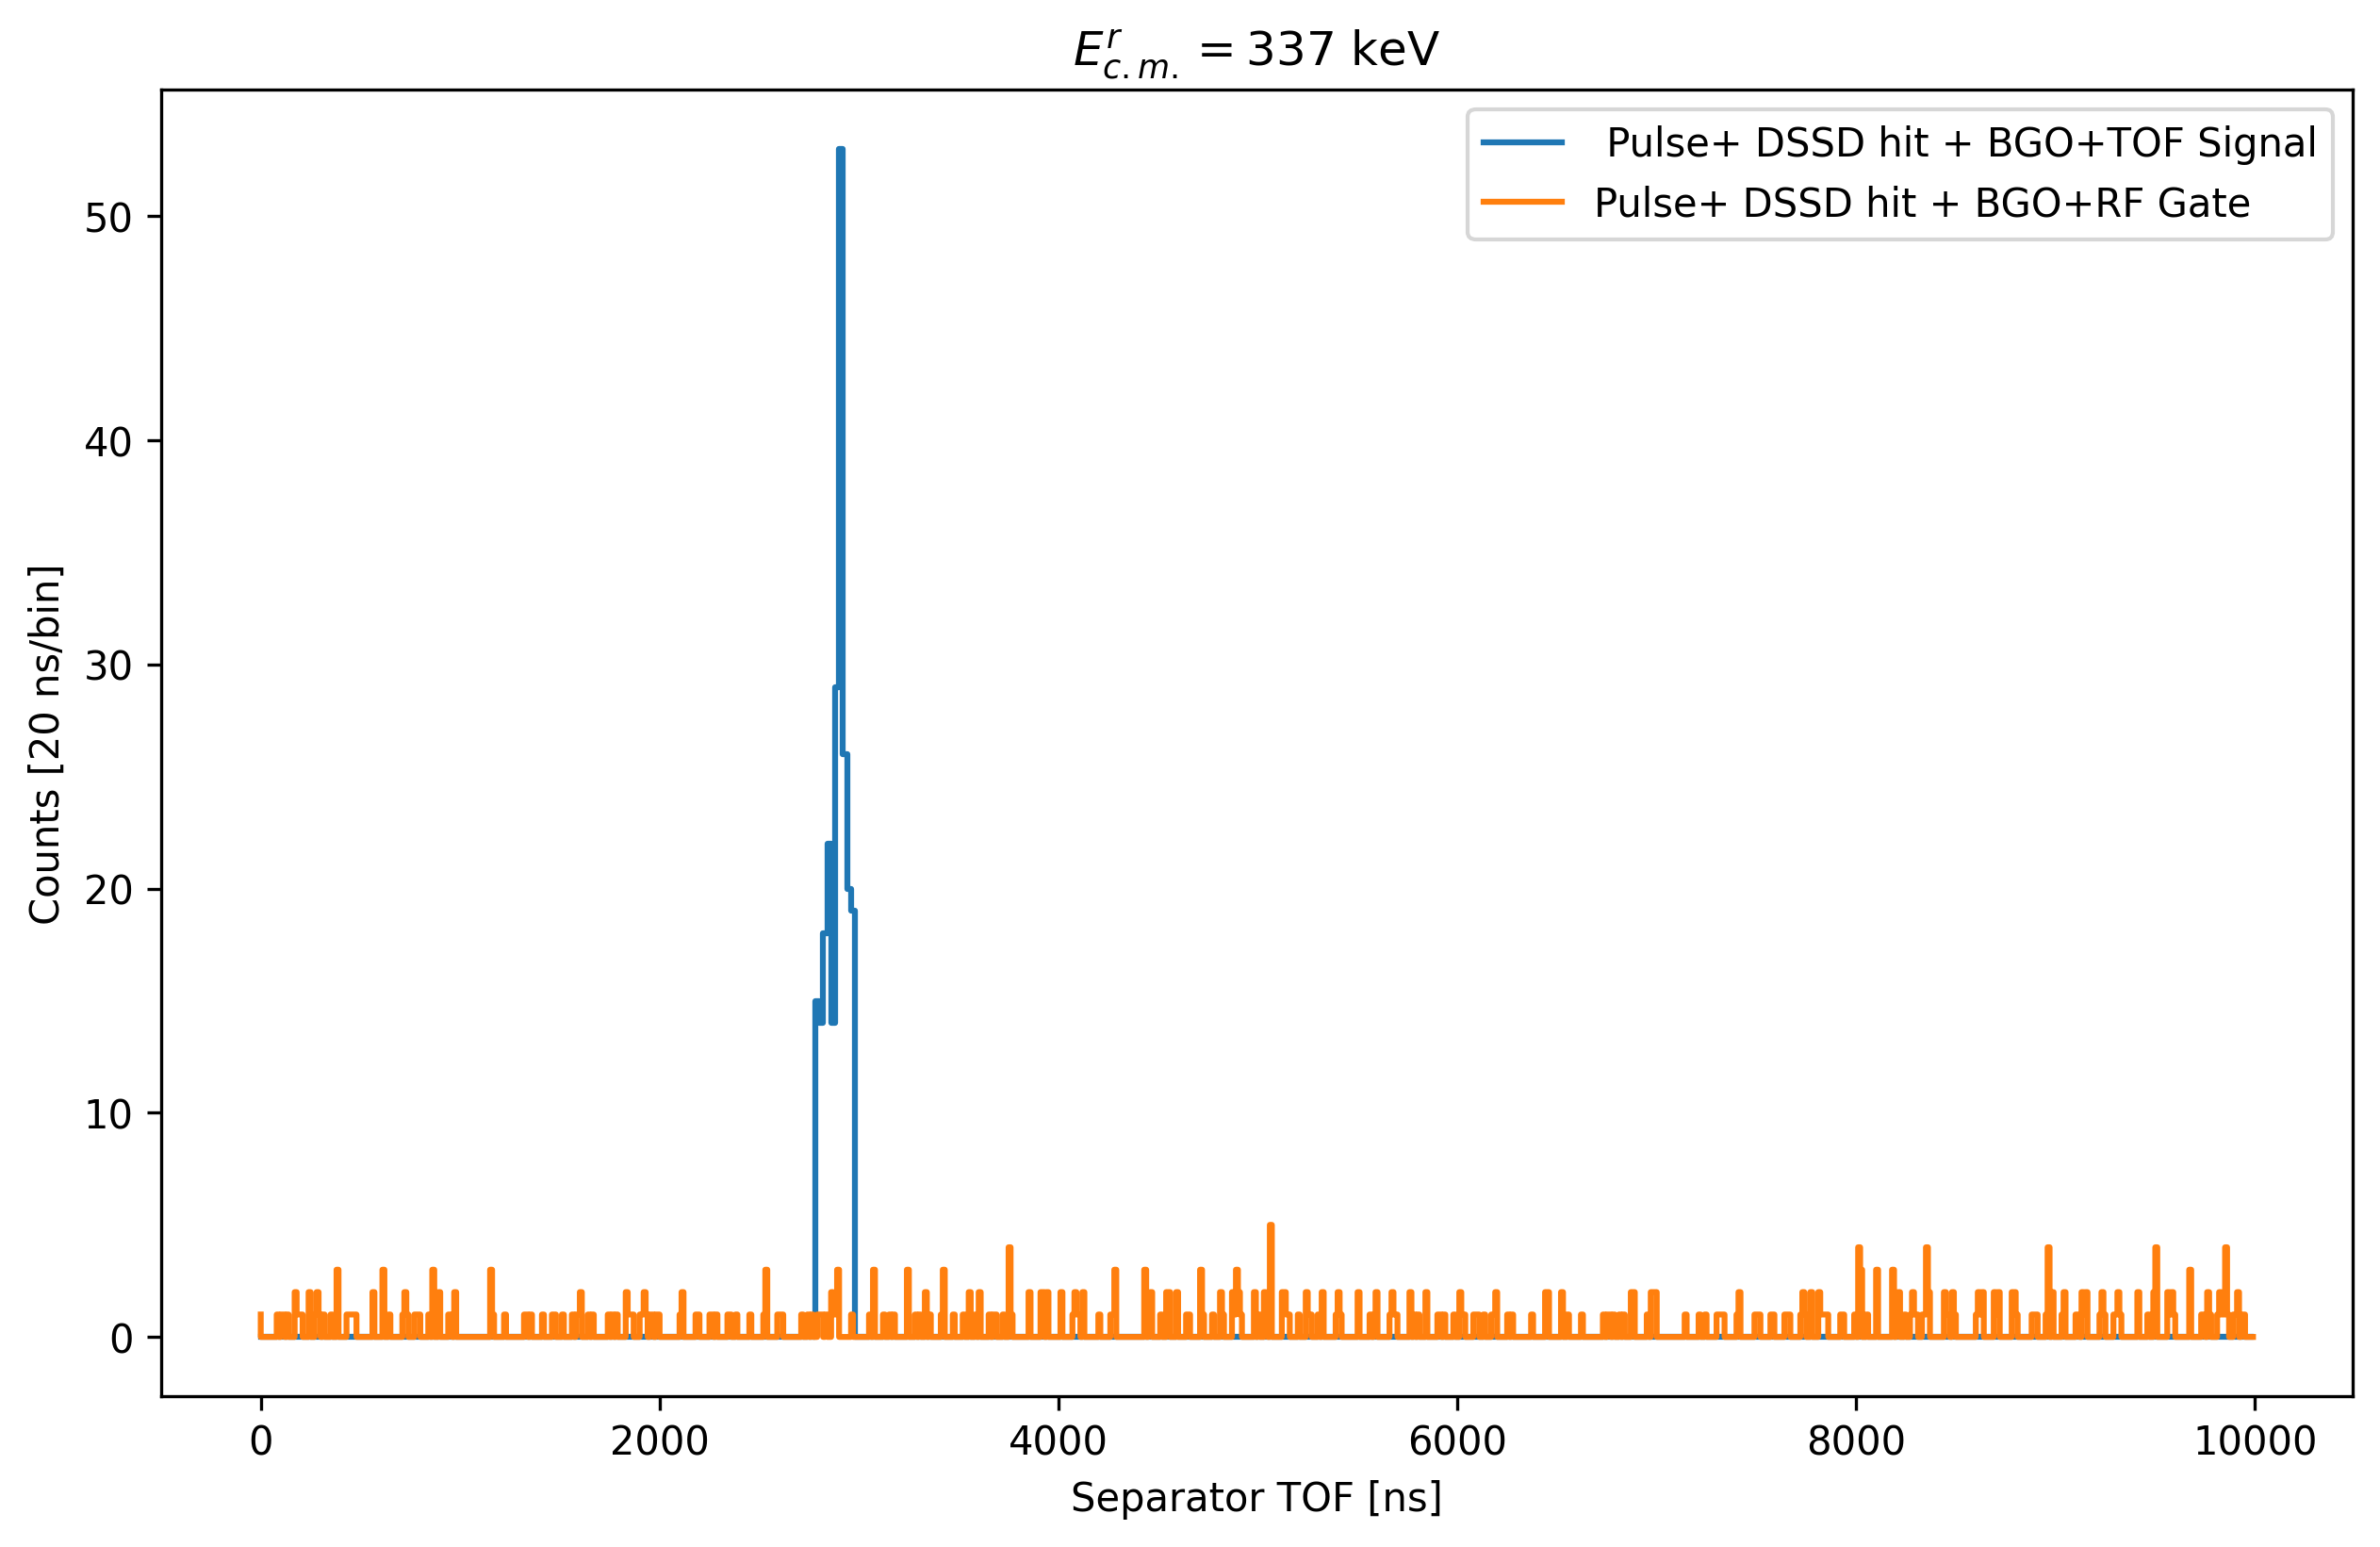

In [11]:
h_septof_signal = TH1F("h_septof_signal", " ", 500, 0, 10000)
t5.Draw("xtofh >> h_septof_signal", pulse + " && " + dsssdhit + " && " + septof + " && " + bgo0, "goff")

h_septof_signal  = ROOT.gDirectory.Get("h_septof_signal")

# Convert the histogram to NumPy arrays
n_bins = h_septof_signal.GetNbinsX()
x_edges = np.array([h_septof_signal.GetBinLowEdge(i) for i in range(1, n_bins + 2)])
y_values = np.array([h_septof_signal.GetBinContent(i) for i in range(1, n_bins + 1)])

# Create the step plot using Matplotlib
plt.figure(figsize=(10, 6),dpi=300)

plt.step(x_edges[:-1], y_values,label=" Pulse+ DSSD hit + BGO+TOF Signal")

# Add labels and title
plt.xlabel('Separator TOF [ns]')
plt.ylabel('Counts [20 ns/bin]')
plt.title(r'$E^{r}_{c.m.} = 337 \text{ keV}$')

h_septof_RFGate = TH1F("h_septof_RFGate", "E^{r}_{c.m.} = 337 keV", 1000, 0, 10000)
t5.Draw("xtofh >> h_septof_RFGate", pulse + " && " + dsssdhit + " && " + bgo0 + " && head.tcal_rf > 10220 && head.tcal_rf < 10240", "goff")

h_septof_RFGate  = ROOT.gDirectory.Get("h_septof_RFGate")

# Convert the histogram to NumPy arrays
n_bins = h_septof_RFGate.GetNbinsX()
x_edges_RFGate = np.array([h_septof_RFGate.GetBinLowEdge(i) for i in range(1, n_bins + 2)])
y_values_RFGate = np.array([h_septof_RFGate.GetBinContent(i) for i in range(1, n_bins + 1)])

plt.step(x_edges_RFGate[:-1], y_values_RFGate,label="Pulse+ DSSD hit + BGO+RF Gate")

plt.legend()



In [12]:
# Print integrals
signal = h_septof.Integral(h_septof.FindBin(2800), h_septof.FindBin(3000))
print(f"signal = {signal}")


signal = 237.0


In [13]:
backgroundLow = [1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2300, 2400]
backgroundWidth = 200


In [14]:
sum_background = 0
for i in range(10):
    integral = h_septof.Integral(h_septof.FindBin(backgroundLow[i]), h_septof.FindBin(backgroundLow[i] + backgroundWidth))
    print(f"Background {i} = {integral}")
    sum_background += integral

sum_background /= 10
print(f"background = {sum_background}")


Background 0 = 204.0
Background 1 = 182.0
Background 2 = 171.0
Background 3 = 182.0
Background 4 = 184.0
Background 5 = 201.0
Background 6 = 208.0
Background 7 = 201.0
Background 8 = 164.0
Background 9 = 155.0
background = 185.2
